In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



environment_parameters_polder = '/home/ihor/work_space/grasp/home/aerosol_UA_simulation/environment_parameters/image_dat_Banizounbou_polder.txt'
environment_parameters_msip = '/home/ihor/work_space/grasp/home/aerosol_UA_simulation/environment_parameters/image_dat_Banizounbou_MSIP.txt'

In [2]:
polder_wl = np.array([0.4430, 0.4900, 0.5650, 0.6700, 0.8650, 1.0200])
msip_wl = np.array([0.4100000, 0.4430000, 0.4700000, 0.4900000, 0.5550000, 0.6700000, 0.8650000, 0.9100000])

n_wl = len(polder_wl)

In [3]:
par_lines = []
with open(environment_parameters_polder, 'r') as f:
    par_lines = f.readlines()

In [4]:
values = [line.split()[1:] for line in par_lines]
values = np.array(values)

In [5]:
params_size = {'size_distribution_precalculated_lognormal': 5,
               'real_part_of_refractive_index_spectral_dependent': n_wl,
               'imaginary_part_of_refractive_index_spectral_dependent': n_wl,
               'sphere_fraction': 1,
               'vertical_profile_parameter_height': 1,
               'surface_land_brdf_ross_li_1': n_wl,
               'surface_land_brdf_ross_li_2': n_wl, # +
               'surface_land_brdf_ross_li_3': n_wl, # +
               'surface_land_polarized_maignan_breon': n_wl,
               'surface_water_cox_munk_iso_1': n_wl, 
               'surface_water_cox_munk_iso_2': n_wl, # +
               'surface_water_cox_munk_iso_3': n_wl # +
}

In [6]:
values_dict = {}
start = 0
for key in params_size:
    end = start + params_size[key]
    values_dict[key] = values[start : end]
    start = end

In [7]:
from scipy import interpolate

msip_values_dict = {}
for key in values_dict:
    if params_size[key] == n_wl:
        value = []
        for t in values_dict[key].T:
            lr = interpolate.interp1d(polder_wl, t, bounds_error=False, fill_value="extrapolate")
            extra = lr(msip_wl)
            extra = np.where(extra < 0, 0, extra)
            value.append(extra)
        msip_values_dict[key] = np.array(value).T
    else:
        msip_values_dict[key] = values_dict[key]



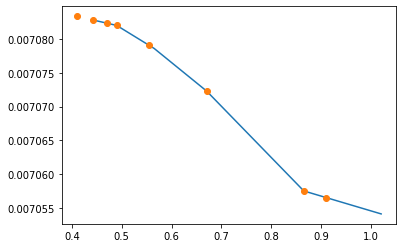

In [8]:
for t in values_dict['surface_water_cox_munk_iso_1'].T:
    lr = interpolate.interp1d(polder_wl, t, bounds_error=False, fill_value="extrapolate")
    
    
    
plt.plot(polder_wl, t.astype(float))    
plt.plot(msip_wl, lr(msip_wl), 'o')

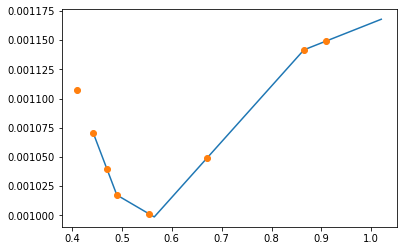

In [9]:
for t in values_dict['imaginary_part_of_refractive_index_spectral_dependent'].T:
    lr = interpolate.interp1d(polder_wl, t, bounds_error=False, fill_value="extrapolate")
    
    
    
plt.plot(polder_wl, t.astype(float))    
plt.plot(msip_wl, lr(msip_wl), 'o')

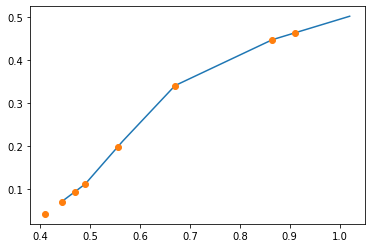

In [10]:
for t in values_dict['surface_land_brdf_ross_li_1'].T:
    lr = interpolate.interp1d(polder_wl, t, bounds_error=False, fill_value="extrapolate")
    
    
    
plt.plot(polder_wl, t.astype(float))    
plt.plot(msip_wl, lr(msip_wl), 'o')

In [11]:
general_arr = np.concatenate(list(msip_values_dict.values()))
indexes = np.array(range(general_arr.shape[0])) + 1

general_arr_with_index = np.concatenate([indexes.reshape(-1,1), general_arr], axis=1)

In [12]:
general_arr_with_index

array([['1', '0.76306E-02', '0.76860E-02', ..., '0.71119E-02',
        '0.74769E-02', '0.74060E-02'],
       ['2', '0.80769E-02', '0.81498E-02', ..., '0.76207E-02',
        '0.79763E-02', '0.78252E-02'],
       ['3', '0.93716E-02', '0.95018E-02', ..., '0.90802E-02',
        '0.93461E-02', '0.91798E-02'],
       ...,
       ['77', '0.010644', '0.010643', ..., '0.010419', '0.010424',
        '0.010422'],
       ['78', '0.010644', '0.010643', ..., '0.010419', '0.010424',
        '0.010422'],
       ['79', '0.010644', '0.010643', ..., '0.010419', '0.010424',
        '0.010422']], dtype='<U32')

In [13]:
with open(environment_parameters_msip, 'w') as f:
    for line in general_arr_with_index:
        f.write('\t'.join(line))
        f.write('\n')
